## Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
df = pd.read_csv('citibike_weather_cleaned_2022.csv', index_col = 0)

C:\Users\beaac\AppData\Local\Temp\ipykernel_3528\3026167464.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('citibike_weather_cleaned_2022.csv', index_col = 0)


## Create a bar chart with the most frequented starting stations

Theme, style and palette for all plots: 
- Style: tick 
- Palette: Blues_r
  


# Top 20 starting stations

In [3]:
df['value'] = 1

In [4]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'date', 'avgTemp', '_merge', 'value'],
      dtype='object')

In [5]:
df_t= df.groupby('start_station_name')['value'].count().reset_index()

In [6]:
df_t

,start_station_name,value
0,1 Ave & E 110 St,21478
1,1 Ave & E 16 St,67236
2,1 Ave & E 18 St,70731
3,1 Ave & E 30 St,45341
4,1 Ave & E 39 St,52287
...,...,...
1756,Wyckoff Ave & Gates Ave,16516
1757,Wyckoff St & 3 Ave,250
1758,Wyckoff St & Nevins St,11503
1759,Wythe Ave & Metropolitan Ave,66340


In [7]:
top20= df_t.nlargest(20, 'value')


In [8]:
top20

,start_station_name,value
1587,W 21 St & 6 Ave,128823
1718,West St & Chambers St,123045
495,Broadway & W 58 St,114040
286,6 Ave & W 33 St,106236
8,1 Ave & E 68 St,104685
461,Broadway & E 14 St,98656
485,Broadway & W 25 St,98237
1511,University Pl & E 14 St,96941
463,Broadway & E 21 St,95533
1603,W 31 St & 7 Ave,94035


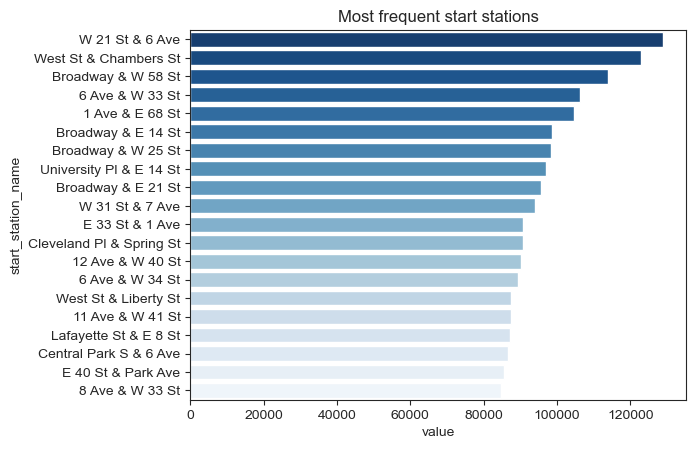

In [9]:
sns.set_style("ticks")
sns.barplot(data=top20, x='value', y='start_station_name', palette="Blues_r")
plt.title("Most frequent start stations")
plt.show()

# Dual-axis line plot 

In [10]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [11]:
# group  by count of trips per day 
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [12]:
df_group.head()

,date,ride_id
0,2022-01-01,20198
1,2022-01-02,42203
2,2022-01-03,32453
3,2022-01-04,35869
4,2022-01-05,33689


In [13]:
df_group.tail()

,date,ride_id
360,2022-12-27,32936
361,2022-12-28,43873
362,2022-12-29,51489
363,2022-12-30,62106
364,2022-12-31,31372


In [21]:
df.columns

Index(['ride_id_x', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'date', 'avgTemp', '_merge', 'value',
       'ride_id_y', 'merge_flag'],
      dtype='object')

In [22]:
df.drop(columns='merge_flag', inplace=True)
df = df.merge(df_group, on='date', how='outer', indicator='merge_flag')


In [30]:
df_group.rename(columns = {'ride_id': 'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = 'merge_flag2')
print(df['merge_flag2'].value_counts(dropna = False))

df_temp = df.set_index('date')
print(df_temp.columns)

both          29768282
left_only            0
right_only           0
Name: merge_flag2, dtype: int64
Index(['ride_id_x', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'avgTemp', '_merge', 'value',
       'ride_id_y', 'bike_rides_daily_x', 'merge_flag', 'bike_rides_daily_y',
       'merge_flag1', 'bike_rides_daily', 'merge_flag2'],
      dtype='object')


In [31]:
df_temp.columns

Index(['ride_id_x', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'avgTemp', '_merge', 'value',
       'ride_id_y', 'bike_rides_daily_x', 'merge_flag', 'bike_rides_daily_y',
       'merge_flag1', 'bike_rides_daily', 'merge_flag2'],
      dtype='object')

In [32]:
df_temp.head()

,ride_id_x,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,avgTemp,_merge,value,ride_id_y,bike_rides_daily_x,merge_flag,bike_rides_daily_y,merge_flag1,bike_rides_daily,merge_flag2
date,,,,,,,,,,,,,,,,,,,,,
2022-01-21,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,...,-6.0,both,1,33490,33490,both,33490,both,33490,both
2022-01-21,096AE4C21473D1D6,electric_bike,2022-01-21 20:32:55.968,2022-01-21 20:35:20.227,Riverside Dr & W 91 St,7524.16,Riverside Dr & W 82 St,7388.1,40.793135,-73.977004,...,-6.0,both,1,33490,33490,both,33490,both,33490,both
2022-01-21,B3996D7CAEDF7B92,classic_bike,2022-01-21 09:14:04.856,2022-01-21 09:18:53.000,Henry St & Atlantic Ave,4531.05,Clinton St & Tillary St,4748.07,40.690893,-73.996123,...,-6.0,both,1,33490,33490,both,33490,both,33490,both
2022-01-21,83AE874442FFF355,electric_bike,2022-01-21 17:30:27.244,2022-01-21 17:36:00.300,Cleveland Pl & Spring St,5492.05,Rivington St & Ridge St,5406.02,40.722104,-73.997249,...,-6.0,both,1,33490,33490,both,33490,both,33490,both
2022-01-21,8B1950B6ED5BD50A,electric_bike,2022-01-21 10:12:57.242,2022-01-21 10:31:37.016,1 Ave & E 62 St,6753.08,Allen St & Rivington St,5414.06,40.761227,-73.960940,...,-6.0,both,1,33490,33490,both,33490,both,33490,both


In [28]:
print(df['date'].min())
print(df_group['date'].min())


2022-01-01 00:00:00
2022-01-01 00:00:00


In [33]:
df['bike_rides_daily'] = df['bike_rides_daily']  # or choose _x or _y if needed


In [34]:
df.drop(columns=['bike_rides_daily_x', 'bike_rides_daily_y'], inplace=True)


In [35]:
df.drop(columns=['merge_flag', 'merge_flag1', 'merge_flag2', '_merge'], inplace=True)


In [36]:
df.sort_values('date', inplace=True)
df_temp = df.set_index('date')


In [37]:
print(df_temp[['bike_rides_daily', 'avgTemp']].head())


            bike_rides_daily  avgTemp
date                                 
2022-01-01             20198     11.6
2022-01-01             20198     11.6
2022-01-01             20198     11.6
2022-01-01             20198     11.6
2022-01-01             20198     11.6


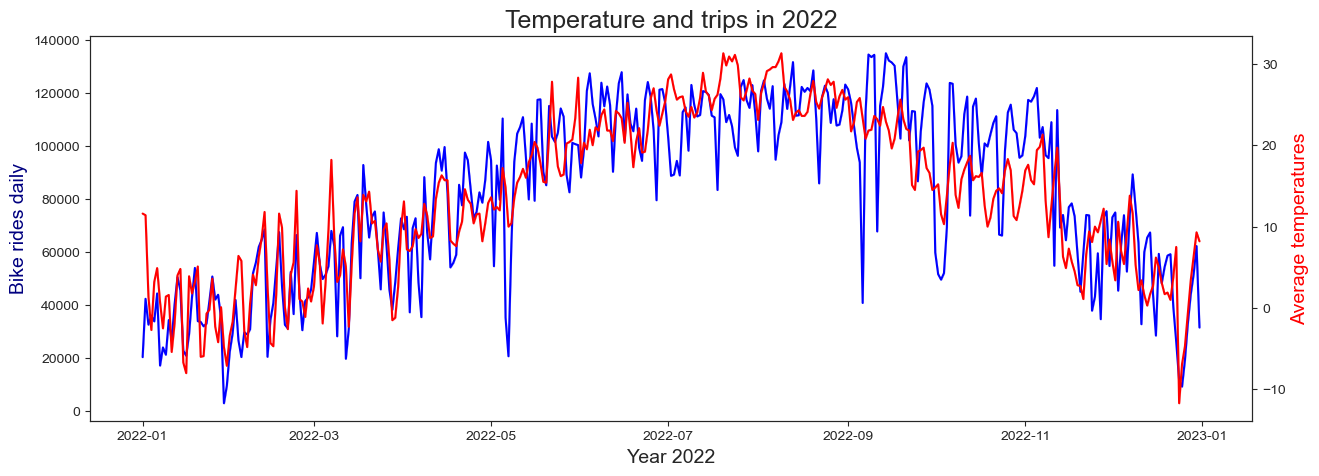

In [38]:
fig,ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data = df_temp['bike_rides_daily'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_temp['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()


# Box Plot Trip Duration by User 

In [40]:
df.dtypes

ride_id_x                     object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
start_time                    object
date                  datetime64[ns]
avgTemp                      float64
value                          int64
ride_id_y                      int64
bike_rides_daily               int64
dtype: object

In [41]:
df['member_casual']

559144      casual
550826      member
550827      member
550828      member
550829      casual
             ...  
29741321    member
29741322    member
29741323    member
29741316    member
29735570    member
Name: member_casual, Length: 29768282, dtype: object

In [42]:
df.columns

Index(['ride_id_x', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'date', 'avgTemp', 'value', 'ride_id_y',
       'bike_rides_daily'],
      dtype='object')

In [44]:
#Calulate trip duration

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])


In [45]:
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


In [49]:
df['ride_length']. head()

559144    14.484783
550826    17.607983
550827     9.096683
550828    31.381333
550829    13.375583
Name: ride_length, dtype: float64

In [52]:
df_filtered = df[(df['ride_length'] >= 1) & (df['ride_length'] <= 120)]


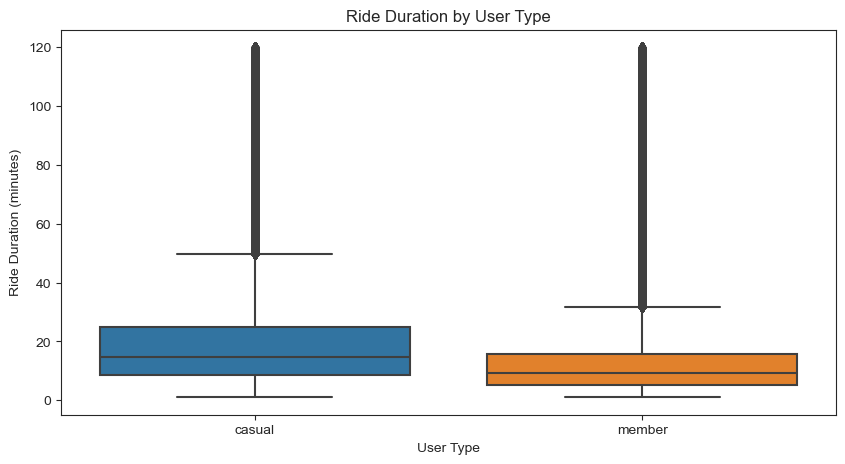

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_filtered, x='member_casual', y='ride_length')
plt.title("Ride Duration by User Type")
plt.xlabel("User Type")
plt.ylabel("Ride Duration (minutes)")
plt.show()


The box plot compares the distribution of ride lengths between casual and member users. Casual riders show a significantly higher median ride length , suggesting more variability in how long they ride. In contrast, member rides tend to be shorter and more consistent, likely reflectig routine commuting behavior.

# FacetGrids

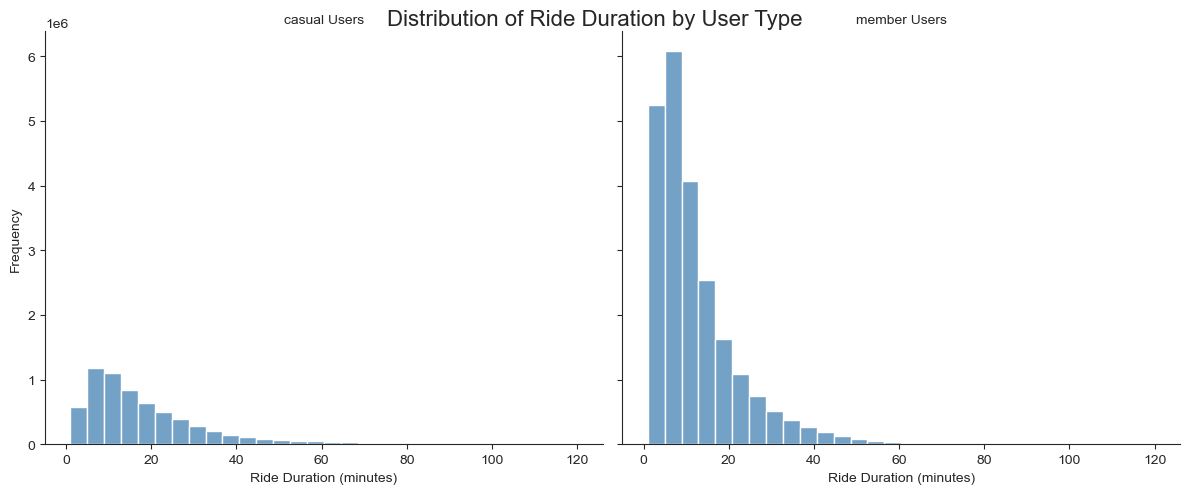

In [57]:
# Create FacetGrid
g = sns.FacetGrid(df_filtered, col='member_casual', height=5, aspect=1.2)
g.map(sns.histplot, 'ride_length', bins=30, color='steelblue')
g.set_axis_labels("Ride Duration (minutes)", "Frequency")
g.set_titles("{col_name} Users")
g.fig.suptitle("Distribution of Ride Duration by User Type", fontsize=16)
plt.show()

In [58]:
g.savefig("ride_duration_facetgrid.png")


The histogram reveals that member users dominate in frequency, indicating they make up the bulk of daily rides. Both casual and member users share a common peak ride duration between 10-15 minutes, suggesting this is the most typical trip length across the board. 